In [1]:
import numpy as np
import torch
from torch import nn
from torch.utils import data
import matplotlib.pyplot as plt
from sklearn import metrics
from torchvision import transforms
from dataset import CatDog
from model import DogvsCatModel

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

transform = transforms.Compose(
    [
        transforms.Resize(size=(256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225],
        ),
    ]
)

cuda


In [3]:
fullData = CatDog(root="CATDOG/train/", transform=transform)
N = len(fullData)
trainL = int(0.99 * N)
testL = N - trainL

trainData, testData = data.random_split(fullData, [trainL, testL])
trainLoader = data.DataLoader(dataset=trainData, batch_size=8, shuffle=True)
testLoader = data.DataLoader(dataset=testData, batch_size=testL)
testX, testY = next(iter(testLoader))
testX = testX.to(device)
testY = testY.type(torch.float).to(device)

In [4]:
model = DogvsCatModel().to(device)
optim = torch.optim.Adam(params=model.parameters(), lr=1e-4)
criterion = nn.BCELoss()

In [5]:
history = [[],[]]
minValLoss = np.inf
for _ in range(2):
    for trainX, trainY in trainLoader:
        model.train()
        trainX = trainX.to(device)
        trainY = trainY.type(torch.float).to(device)

        pred = model(trainX).squeeze(1)
        loss = criterion(pred, trainY)
        loss.backward()
        optim.step()
        optim.zero_grad()
        with torch.no_grad():
            model.eval()
            pred = model(testX).squeeze(1)
            val_loss = criterion(pred, testY)
        history[0].append(loss.item())
        history[1].append(val_loss.item())
        print(f"loss: {loss.item()} val_loss: {val_loss}")
        if val_loss.item() <= minValLoss:
            minValLoss = val_loss.item()
            torch.save(model, "checkpoint.pt")
            print("model saved")

/home/ykc/dev/miniconda3/envs/torch/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448238472/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


loss: 0.7648485898971558 val_loss: 0.6902183890342712
model saved
loss: 1.1182160377502441 val_loss: 0.7423824667930603
loss: 1.8997026681900024 val_loss: 0.6829715371131897
model saved
loss: 5.544567108154297 val_loss: 0.7324030995368958
loss: 1.479681372642517 val_loss: 0.8087615370750427
loss: 1.675649642944336 val_loss: 0.8606810569763184
loss: 3.6646666526794434 val_loss: 0.7305200099945068
loss: 0.7347015738487244 val_loss: 0.7180162072181702
loss: 1.8185062408447266 val_loss: 0.8072020411491394
loss: 1.9148386716842651 val_loss: 1.2386833429336548
loss: 3.624302864074707 val_loss: 1.4742058515548706
loss: 4.619011878967285 val_loss: 1.3855249881744385
loss: 3.333035945892334 val_loss: 1.085308313369751
loss: 1.0630242824554443 val_loss: 0.885246217250824
loss: 0.5135084390640259 val_loss: 0.8167198896408081
loss: 1.4209378957748413 val_loss: 0.7877289056777954
loss: 1.4179060459136963 val_loss: 0.8691027760505676
loss: 0.7600439786911011 val_loss: 1.0192993879318237
loss: 0.3702

loss: 4.453558921813965 val_loss: 2.9909796714782715
loss: 1.140153169631958 val_loss: 2.0933585166931152
loss: 2.3881256580352783 val_loss: 1.1140002012252808
loss: 0.11610881984233856 val_loss: 1.1195491552352905
loss: 1.0212335586547852 val_loss: 1.5928457975387573
loss: 3.7373411655426025 val_loss: 1.9436933994293213
loss: 3.579524040222168 val_loss: 1.8180122375488281
loss: 1.1794383525848389 val_loss: 1.5342516899108887
loss: 2.4454126358032227 val_loss: 1.1326791048049927
loss: 0.8997936248779297 val_loss: 1.0027498006820679
loss: 1.295370101928711 val_loss: 1.1664178371429443
loss: 0.8898693323135376 val_loss: 1.5030864477157593
loss: 1.4812593460083008 val_loss: 1.725730061531067
loss: 3.432642936706543 val_loss: 1.548219084739685
loss: 1.1968204975128174 val_loss: 1.2922394275665283
loss: 2.200728416442871 val_loss: 1.01516592502594
loss: 2.6208269596099854 val_loss: 0.9995840191841125
loss: 1.054347038269043 val_loss: 1.064168095588684
loss: 1.4826902151107788 val_loss: 1.03

loss: 0.48758992552757263 val_loss: 0.5912136435508728
model saved
loss: 0.535102128982544 val_loss: 0.6431790590286255
loss: 1.290818452835083 val_loss: 0.6448009610176086
loss: 1.2977404594421387 val_loss: 0.603759765625
loss: 0.829835832118988 val_loss: 0.6007260084152222
loss: 0.4763941764831543 val_loss: 0.641272246837616
loss: 0.7630454897880554 val_loss: 0.6830383539199829
loss: 0.5268157720565796 val_loss: 0.7966559529304504
loss: 0.8012282848358154 val_loss: 0.8906989693641663
loss: 1.0271129608154297 val_loss: 0.8438461422920227
loss: 0.9547145366668701 val_loss: 0.6950698494911194
loss: 0.48157939314842224 val_loss: 0.597684919834137
loss: 0.6979030966758728 val_loss: 0.5912491679191589
loss: 0.30009710788726807 val_loss: 0.6130303144454956
loss: 1.309166669845581 val_loss: 0.6229974627494812
loss: 0.5434439182281494 val_loss: 0.5965405106544495
loss: 0.7303599119186401 val_loss: 0.5889137387275696
model saved
loss: 1.0849225521087646 val_loss: 0.5856289267539978
model saved

loss: 0.468670129776001 val_loss: 0.5698326826095581
loss: 0.44956061244010925 val_loss: 0.5695052742958069
loss: 0.27423450350761414 val_loss: 0.5741010308265686
loss: 0.466634601354599 val_loss: 0.5725524425506592
loss: 0.5479574203491211 val_loss: 0.5709934234619141
loss: 0.3774683475494385 val_loss: 0.5693676471710205
loss: 0.5713491439819336 val_loss: 0.5696344375610352
loss: 0.64302659034729 val_loss: 0.5795629024505615
loss: 0.3995824456214905 val_loss: 0.5946192741394043
loss: 0.3412410616874695 val_loss: 0.6468410491943359
loss: 0.4342638850212097 val_loss: 0.6941128373146057
loss: 0.7218575477600098 val_loss: 0.7417643070220947
loss: 0.9201537370681763 val_loss: 0.7259532809257507
loss: 0.7083320617675781 val_loss: 0.6611047387123108
loss: 0.6868844032287598 val_loss: 0.6066871285438538
loss: 0.7253318428993225 val_loss: 0.5765829682350159
loss: 0.8108335733413696 val_loss: 0.5702794194221497
loss: 0.4852953255176544 val_loss: 0.5708764791488647
loss: 0.5837455987930298 val_l

loss: 0.6707055568695068 val_loss: 0.6790738105773926
loss: 0.7142153978347778 val_loss: 0.7236546874046326
loss: 0.746079683303833 val_loss: 0.7552282810211182
loss: 0.7939359545707703 val_loss: 0.7832362651824951
loss: 0.3459544777870178 val_loss: 0.8002180457115173
loss: 0.6079763174057007 val_loss: 0.7656240463256836
loss: 0.6610766649246216 val_loss: 0.7082164287567139
loss: 0.5075620412826538 val_loss: 0.6498295664787292
loss: 0.6874744892120361 val_loss: 0.6279338598251343
loss: 0.6696481704711914 val_loss: 0.597345232963562
loss: 0.48538634181022644 val_loss: 0.5839465856552124
loss: 0.5693418383598328 val_loss: 0.580136775970459
loss: 0.6900547742843628 val_loss: 0.5866270065307617
loss: 0.5665522217750549 val_loss: 0.5941568613052368
loss: 0.9354469776153564 val_loss: 0.5953160524368286
loss: 0.7281961441040039 val_loss: 0.5828612446784973
loss: 0.38082870841026306 val_loss: 0.5752077698707581
loss: 0.8527365326881409 val_loss: 0.5745057463645935
loss: 0.6743150949478149 val_

loss: 1.0458948612213135 val_loss: 0.5514240860939026
loss: 0.9388971328735352 val_loss: 0.5412638187408447
model saved
loss: 0.6318328380584717 val_loss: 0.5511525869369507
loss: 0.5024824142456055 val_loss: 0.58244788646698
loss: 0.5546485185623169 val_loss: 0.6244620680809021
loss: 0.7774463891983032 val_loss: 0.6485525369644165
loss: 0.7333696484565735 val_loss: 0.6614555716514587
loss: 0.7352914810180664 val_loss: 0.6662096381187439
loss: 0.5041238069534302 val_loss: 0.6662766933441162
loss: 0.5859832763671875 val_loss: 0.6535464525222778
loss: 0.5133883953094482 val_loss: 0.6252223253250122
loss: 0.38080230355262756 val_loss: 0.6006014943122864
loss: 0.5019305944442749 val_loss: 0.5713911652565002
loss: 0.4159150719642639 val_loss: 0.559007465839386
loss: 0.7150073051452637 val_loss: 0.5542746782302856
loss: 0.5733089447021484 val_loss: 0.5499571561813354
loss: 0.741552472114563 val_loss: 0.5507009625434875
loss: 0.9470219612121582 val_loss: 0.5528841018676758
loss: 0.46487158536

loss: 0.5745104551315308 val_loss: 0.5546702742576599
loss: 0.716320276260376 val_loss: 0.5463171005249023
loss: 0.40420907735824585 val_loss: 0.5424644947052002
loss: 0.43239179253578186 val_loss: 0.5360625982284546
loss: 0.43903636932373047 val_loss: 0.533423662185669
model saved
loss: 1.0092405080795288 val_loss: 0.5353734493255615
loss: 0.29878300428390503 val_loss: 0.538543164730072
loss: 0.4647561013698578 val_loss: 0.5407803058624268
loss: 0.5636160969734192 val_loss: 0.5396171808242798
loss: 0.6185615062713623 val_loss: 0.5334925055503845
loss: 0.9631615877151489 val_loss: 0.527597188949585
model saved
loss: 0.6986050605773926 val_loss: 0.5322302579879761
loss: 0.6522805690765381 val_loss: 0.5395613312721252
loss: 0.7383772134780884 val_loss: 0.5676107406616211
loss: 0.7414306998252869 val_loss: 0.603731095790863
loss: 0.45208626985549927 val_loss: 0.6628232002258301
loss: 0.4199058413505554 val_loss: 0.721976637840271
loss: 0.5855581164360046 val_loss: 0.7720494270324707
loss:

loss: 0.4958685636520386 val_loss: 0.5471959710121155
loss: 0.31402409076690674 val_loss: 0.5472790002822876
loss: 0.5746828317642212 val_loss: 0.5495288372039795
loss: 0.6330264806747437 val_loss: 0.5510480403900146
loss: 0.6393699645996094 val_loss: 0.5503685474395752
loss: 0.8318933844566345 val_loss: 0.5463376641273499
loss: 0.5294134616851807 val_loss: 0.5428913831710815
loss: 0.7227472066879272 val_loss: 0.5398980975151062
loss: 0.8601256608963013 val_loss: 0.5393469929695129
loss: 0.46838968992233276 val_loss: 0.5381463766098022
loss: 0.7069745659828186 val_loss: 0.5401379466056824
loss: 0.5526137351989746 val_loss: 0.5429726243019104
loss: 0.4745834469795227 val_loss: 0.5480021834373474
loss: 0.44147348403930664 val_loss: 0.5460616946220398
loss: 0.47578495740890503 val_loss: 0.5416480898857117
loss: 0.6282131671905518 val_loss: 0.5398756861686707
loss: 0.42397114634513855 val_loss: 0.5440312623977661
loss: 0.670700192451477 val_loss: 0.5515814423561096
loss: 0.4120913743972778

loss: 0.9302878975868225 val_loss: 0.5819648504257202
loss: 0.5015758275985718 val_loss: 0.5738468766212463
loss: 0.3818744421005249 val_loss: 0.5695688128471375
loss: 0.7206987142562866 val_loss: 0.5547780394554138
loss: 0.2956724464893341 val_loss: 0.5420314073562622
loss: 0.38211768865585327 val_loss: 0.5364439487457275
loss: 0.6552999019622803 val_loss: 0.537992000579834
loss: 0.6842033267021179 val_loss: 0.5389900207519531
loss: 0.5667727589607239 val_loss: 0.5401279330253601
loss: 0.5580479502677917 val_loss: 0.5415531396865845
loss: 0.49798280000686646 val_loss: 0.5449854731559753
loss: 0.3896893262863159 val_loss: 0.5494421124458313
loss: 0.4769790768623352 val_loss: 0.5510307550430298
loss: 0.4968571066856384 val_loss: 0.5515525341033936
loss: 0.638840913772583 val_loss: 0.5614268779754639
loss: 0.4660102427005768 val_loss: 0.5601242780685425
loss: 0.6967762112617493 val_loss: 0.5505309104919434
loss: 0.6478967666625977 val_loss: 0.5309349894523621
loss: 0.62370365858078 val_l

loss: 0.6547002792358398 val_loss: 0.5819946527481079
loss: 0.40757811069488525 val_loss: 0.56974858045578
loss: 0.7128404378890991 val_loss: 0.5473875403404236
loss: 0.562525749206543 val_loss: 0.5328189730644226
loss: 0.5738139152526855 val_loss: 0.5200874209403992
loss: 0.4783337712287903 val_loss: 0.5166463255882263
model saved
loss: 0.4793490171432495 val_loss: 0.5178489685058594
loss: 0.22439369559288025 val_loss: 0.5244517922401428
loss: 0.48096442222595215 val_loss: 0.5331888198852539
loss: 1.1399956941604614 val_loss: 0.5319430232048035
loss: 0.497183233499527 val_loss: 0.5255829691886902
loss: 0.6826460361480713 val_loss: 0.5160048604011536
model saved
loss: 0.6930481195449829 val_loss: 0.5090081691741943
model saved
loss: 0.523309588432312 val_loss: 0.509772777557373
loss: 0.5663462281227112 val_loss: 0.5175667405128479
loss: 0.7391120791435242 val_loss: 0.5224869847297668
loss: 0.49120038747787476 val_loss: 0.5301856994628906
loss: 0.6692990660667419 val_loss: 0.54226267337

loss: 0.7780259251594543 val_loss: 0.5291380286216736
loss: 0.35300105810165405 val_loss: 0.5236013531684875
loss: 0.512434720993042 val_loss: 0.5179765820503235
loss: 0.6346956491470337 val_loss: 0.517220139503479
loss: 0.6471476554870605 val_loss: 0.5192750692367554
loss: 0.3191835284233093 val_loss: 0.5223609805107117
loss: 0.3663631081581116 val_loss: 0.528250515460968
loss: 0.5954380631446838 val_loss: 0.5312610268592834
loss: 0.38955435156822205 val_loss: 0.5347951650619507
loss: 0.3184669315814972 val_loss: 0.5382988452911377
loss: 0.7686737775802612 val_loss: 0.539190948009491
loss: 0.4195556938648224 val_loss: 0.5389974117279053
loss: 0.560181736946106 val_loss: 0.5448667407035828
loss: 0.6177140474319458 val_loss: 0.5483949184417725
loss: 0.6735378503799438 val_loss: 0.541171669960022
loss: 0.6421011686325073 val_loss: 0.5401797294616699
loss: 0.35979920625686646 val_loss: 0.543709397315979
loss: 0.6943875551223755 val_loss: 0.5431497693061829
loss: 0.6864922046661377 val_los

loss: 1.1137456893920898 val_loss: 0.5874449610710144
loss: 0.239807590842247 val_loss: 0.5764490365982056
loss: 0.6484439373016357 val_loss: 0.5543044805526733
loss: 0.6884876489639282 val_loss: 0.5328195095062256
loss: 0.4242233633995056 val_loss: 0.5203632116317749
loss: 0.6434775590896606 val_loss: 0.512191891670227
loss: 0.5836633443832397 val_loss: 0.5110751390457153
loss: 0.527961254119873 val_loss: 0.5096739530563354
loss: 0.4290462136268616 val_loss: 0.5097025036811829
loss: 0.5207479000091553 val_loss: 0.5147977471351624
loss: 0.6002451181411743 val_loss: 0.5181084871292114
loss: 0.8924940824508667 val_loss: 0.516532838344574
loss: 0.704578161239624 val_loss: 0.5132763981819153
loss: 0.680855393409729 val_loss: 0.5129926800727844
loss: 0.6288926601409912 val_loss: 0.5123746395111084
loss: 0.5291796922683716 val_loss: 0.512493908405304
loss: 0.6226766705513 val_loss: 0.5139572024345398
loss: 0.4093250632286072 val_loss: 0.5149637460708618
loss: 0.47732651233673096 val_loss: 0.

loss: 0.7948747873306274 val_loss: 0.512665331363678
loss: 0.6817869544029236 val_loss: 0.5233264565467834
loss: 0.5942758321762085 val_loss: 0.5294643044471741
loss: 0.7670706510543823 val_loss: 0.5217999219894409
loss: 0.3884619176387787 val_loss: 0.5140097141265869
loss: 0.5276411771774292 val_loss: 0.5029677748680115
loss: 0.4938616156578064 val_loss: 0.49215248227119446
loss: 0.6536012887954712 val_loss: 0.4939563572406769
loss: 0.5990432500839233 val_loss: 0.5155826210975647
loss: 0.37230750918388367 val_loss: 0.5584027171134949
loss: 0.6997131109237671 val_loss: 0.6078560948371887
loss: 0.6015390753746033 val_loss: 0.632999062538147
loss: 0.8322972059249878 val_loss: 0.6283226013183594
loss: 0.5119888782501221 val_loss: 0.6166132688522339
loss: 1.2899261713027954 val_loss: 0.5832188725471497
loss: 0.7122777104377747 val_loss: 0.5429198145866394
loss: 0.5689331293106079 val_loss: 0.5110297203063965
loss: 0.41423290967941284 val_loss: 0.4954657554626465
loss: 0.9910497069358826 va

loss: 0.714790940284729 val_loss: 0.5051343441009521
loss: 0.6020483374595642 val_loss: 0.5114043354988098
loss: 0.4353742003440857 val_loss: 0.5219280123710632
loss: 0.44747230410575867 val_loss: 0.5303100943565369
loss: 0.6894453763961792 val_loss: 0.5249449610710144
loss: 0.48585450649261475 val_loss: 0.5197762846946716
loss: 0.7496895790100098 val_loss: 0.5055102705955505
loss: 0.6772390007972717 val_loss: 0.5005807876586914
loss: 0.4165993332862854 val_loss: 0.498948872089386
loss: 0.6084274649620056 val_loss: 0.49641647934913635
loss: 0.8064879179000854 val_loss: 0.49486473202705383
loss: 0.19646315276622772 val_loss: 0.4939432442188263
loss: 0.5554378628730774 val_loss: 0.4914359450340271
loss: 0.43596553802490234 val_loss: 0.48916611075401306
model saved
loss: 0.431715726852417 val_loss: 0.48786285519599915
model saved
loss: 0.4163699746131897 val_loss: 0.48537686467170715
model saved
loss: 0.4880385994911194 val_loss: 0.484855592250824
model saved
loss: 0.35534054040908813 val

loss: 0.3177877962589264 val_loss: 0.4901556968688965
loss: 0.8370093107223511 val_loss: 0.4990520775318146
loss: 0.7513954639434814 val_loss: 0.5170692205429077
loss: 0.4578569829463959 val_loss: 0.5392646789550781
loss: 0.32541126012802124 val_loss: 0.5625175833702087
loss: 0.879382848739624 val_loss: 0.5645107626914978
loss: 0.6116397380828857 val_loss: 0.5607308149337769
loss: 0.5303186774253845 val_loss: 0.5508052110671997
loss: 0.5499147772789001 val_loss: 0.5397676825523376
loss: 0.3752264976501465 val_loss: 0.5352984666824341
loss: 0.4498550295829773 val_loss: 0.5235613584518433
loss: 0.37861865758895874 val_loss: 0.512039065361023
loss: 0.43323585391044617 val_loss: 0.5079547166824341
loss: 0.35407739877700806 val_loss: 0.5034688115119934
loss: 0.3136306703090668 val_loss: 0.5012246966362
loss: 0.5606452226638794 val_loss: 0.5008820295333862
loss: 0.6183308362960815 val_loss: 0.5009394884109497
loss: 0.3806862235069275 val_loss: 0.4987160861492157
loss: 0.7209954261779785 val_

loss: 0.7623409032821655 val_loss: 0.5799102783203125
loss: 0.25572293996810913 val_loss: 0.6632509231567383
loss: 0.5821309089660645 val_loss: 0.7555155158042908
loss: 0.5882954597473145 val_loss: 0.8359352350234985
loss: 0.9033936262130737 val_loss: 0.8759898543357849
loss: 0.30453142523765564 val_loss: 0.88459712266922
loss: 0.6676955223083496 val_loss: 0.857019305229187
loss: 0.8007007837295532 val_loss: 0.7986299991607666
loss: 0.7967370748519897 val_loss: 0.7245233654975891
loss: 0.7288717031478882 val_loss: 0.6456290483474731
loss: 0.5922387838363647 val_loss: 0.5858327746391296
loss: 1.2848150730133057 val_loss: 0.5302014350891113
loss: 0.26924192905426025 val_loss: 0.5028494596481323
loss: 0.7281020879745483 val_loss: 0.4916340112686157
loss: 0.30921870470046997 val_loss: 0.49533993005752563
loss: 0.5593273639678955 val_loss: 0.5022788047790527
loss: 0.9806211590766907 val_loss: 0.5047520399093628
loss: 0.33244678378105164 val_loss: 0.5056306719779968
loss: 0.49573203921318054

loss: 0.3816162347793579 val_loss: 0.49239200353622437
loss: 0.5766557455062866 val_loss: 0.49342378973960876
loss: 0.3375660181045532 val_loss: 0.49341103434562683
loss: 0.5184829235076904 val_loss: 0.4931282699108124
loss: 0.6583734154701233 val_loss: 0.4925912022590637
loss: 0.3661874234676361 val_loss: 0.4924863576889038
loss: 0.39452701807022095 val_loss: 0.49578094482421875
loss: 0.45951607823371887 val_loss: 0.4937461316585541
loss: 0.7050555944442749 val_loss: 0.4890742897987366
loss: 0.3044233024120331 val_loss: 0.4884779751300812
loss: 0.40836143493652344 val_loss: 0.4862639904022217
loss: 0.40357688069343567 val_loss: 0.4882992208003998
loss: 0.5676677227020264 val_loss: 0.48252713680267334
loss: 0.4529576897621155 val_loss: 0.47846758365631104
loss: 0.44301071763038635 val_loss: 0.47633931040763855
loss: 0.5147619247436523 val_loss: 0.4762111008167267
loss: 0.5652240514755249 val_loss: 0.47472038865089417
loss: 0.2741616666316986 val_loss: 0.4741419851779938
model saved
los

loss: 0.4351665675640106 val_loss: 0.5131554007530212
loss: 0.4055909514427185 val_loss: 0.5322740077972412
loss: 0.8236725926399231 val_loss: 0.5351614952087402
loss: 0.5951154232025146 val_loss: 0.5441373586654663
loss: 0.5613631010055542 val_loss: 0.5500443577766418
loss: 0.2919168174266815 val_loss: 0.540321946144104
loss: 0.45993050932884216 val_loss: 0.5344423055648804
loss: 0.34342360496520996 val_loss: 0.5265452861785889
loss: 0.3021854758262634 val_loss: 0.5271636247634888
loss: 0.4466959238052368 val_loss: 0.5176757574081421
loss: 0.44782817363739014 val_loss: 0.5103623867034912
loss: 0.27063414454460144 val_loss: 0.5012713670730591
loss: 0.6949968934059143 val_loss: 0.48908987641334534
loss: 0.8576302528381348 val_loss: 0.48743098974227905
loss: 0.45144903659820557 val_loss: 0.4900893270969391
loss: 1.132706642150879 val_loss: 0.4931381344795227
loss: 0.735260546207428 val_loss: 0.4848202168941498
loss: 0.5724430084228516 val_loss: 0.4870413541793823
loss: 0.5464531183242798

loss: 0.46084439754486084 val_loss: 0.47272399067878723
loss: 0.24790841341018677 val_loss: 0.4752078354358673
loss: 0.7120625972747803 val_loss: 0.48055341839790344
loss: 0.5348485708236694 val_loss: 0.4996263086795807
loss: 0.26928430795669556 val_loss: 0.5140160322189331
loss: 0.837712287902832 val_loss: 0.5439125299453735
loss: 0.5567793846130371 val_loss: 0.5733829736709595
loss: 0.4548095464706421 val_loss: 0.6155552268028259
loss: 0.21909093856811523 val_loss: 0.6481809616088867
loss: 0.6316380500793457 val_loss: 0.6438077688217163
loss: 0.4691748023033142 val_loss: 0.6434047818183899
loss: 0.9178206920623779 val_loss: 0.6022964119911194
loss: 0.34587258100509644 val_loss: 0.5628505945205688
loss: 0.9661085605621338 val_loss: 0.5118993520736694
loss: 0.5335284471511841 val_loss: 0.48936226963996887
loss: 0.770695149898529 val_loss: 0.4924982488155365
loss: 0.4459976255893707 val_loss: 0.5040927529335022
loss: 0.8451497554779053 val_loss: 0.5178794264793396
loss: 1.15922713279724

loss: 0.3668263554573059 val_loss: 0.48775234818458557
loss: 0.3924356997013092 val_loss: 0.4854986369609833
loss: 0.579490065574646 val_loss: 0.4883616268634796
loss: 0.5063984990119934 val_loss: 0.4832152724266052
loss: 0.42774873971939087 val_loss: 0.4802561402320862
loss: 0.6324515342712402 val_loss: 0.47860628366470337
loss: 0.4041542410850525 val_loss: 0.4780220091342926
loss: 0.2423500418663025 val_loss: 0.4777887165546417
loss: 0.30398109555244446 val_loss: 0.47664162516593933
loss: 0.7184003591537476 val_loss: 0.4761449098587036
loss: 0.6924870014190674 val_loss: 0.47489133477211
loss: 0.25430411100387573 val_loss: 0.4741699993610382
loss: 0.378035306930542 val_loss: 0.47292473912239075
loss: 0.2687259912490845 val_loss: 0.47468191385269165
loss: 0.7633771896362305 val_loss: 0.4759436845779419
loss: 0.3946930766105652 val_loss: 0.4806060492992401
loss: 0.959420919418335 val_loss: 0.4858476221561432
loss: 0.627910315990448 val_loss: 0.5025257468223572
loss: 0.6094611883163452 v

loss: 0.5513401031494141 val_loss: 0.4638238549232483
loss: 0.7478461861610413 val_loss: 0.46511512994766235
loss: 0.3846202492713928 val_loss: 0.4671039283275604
loss: 0.34839797019958496 val_loss: 0.4686804413795471
loss: 0.28583914041519165 val_loss: 0.4713745713233948
loss: 0.45034873485565186 val_loss: 0.47856563329696655
loss: 0.28826385736465454 val_loss: 0.48632633686065674
loss: 0.3146408200263977 val_loss: 0.4987727403640747
loss: 0.6595820188522339 val_loss: 0.5029072761535645
loss: 0.7986881732940674 val_loss: 0.49258291721343994
loss: 0.728664755821228 val_loss: 0.4846287965774536
loss: 0.37573450803756714 val_loss: 0.49306705594062805
loss: 0.413471519947052 val_loss: 0.504830539226532
loss: 0.43989840149879456 val_loss: 0.5204864740371704
loss: 0.2218455970287323 val_loss: 0.5515859723091125
loss: 0.46462345123291016 val_loss: 0.5843740105628967
loss: 0.5686937570571899 val_loss: 0.6227461099624634
loss: 0.3188633322715759 val_loss: 0.6396474838256836
loss: 0.31571954488

loss: 0.4957345128059387 val_loss: 0.48462891578674316
loss: 0.5027844905853271 val_loss: 0.48219412565231323
loss: 0.39908266067504883 val_loss: 0.48467501997947693
loss: 0.39125746488571167 val_loss: 0.482959121465683
loss: 0.23156291246414185 val_loss: 0.4823557734489441
loss: 0.5255262851715088 val_loss: 0.48215365409851074
loss: 0.7689121961593628 val_loss: 0.48508843779563904
loss: 0.5386597514152527 val_loss: 0.48490211367607117
loss: 0.5897600650787354 val_loss: 0.4863855838775635
loss: 0.5854222178459167 val_loss: 0.4956335425376892
loss: 0.9109610319137573 val_loss: 0.4977128803730011
loss: 0.7406866550445557 val_loss: 0.503118634223938
loss: 0.44718027114868164 val_loss: 0.5146856307983398
loss: 0.3845481872558594 val_loss: 0.5265944004058838
loss: 0.5171065330505371 val_loss: 0.5245364308357239
loss: 0.5485404133796692 val_loss: 0.518373429775238
loss: 0.2373034805059433 val_loss: 0.5118141174316406
loss: 0.4151022732257843 val_loss: 0.5136734843254089
loss: 0.5572719573974

loss: 0.7875237464904785 val_loss: 0.501990795135498
loss: 0.1971161961555481 val_loss: 0.492338091135025
loss: 0.7044870853424072 val_loss: 0.4781447947025299
loss: 0.5431561470031738 val_loss: 0.4769074618816376
loss: 0.3782941997051239 val_loss: 0.4788440763950348
loss: 0.2715911567211151 val_loss: 0.47895100712776184
loss: 0.26565802097320557 val_loss: 0.47790026664733887
loss: 0.679330050945282 val_loss: 0.4784547984600067
loss: 0.4985750913619995 val_loss: 0.47855591773986816
loss: 0.5273280143737793 val_loss: 0.4767337739467621
loss: 0.494442343711853 val_loss: 0.4768213927745819
loss: 0.5294237732887268 val_loss: 0.4774586260318756
loss: 0.3627238869667053 val_loss: 0.4792137145996094
loss: 0.42862534523010254 val_loss: 0.480558305978775
loss: 0.5304080247879028 val_loss: 0.4798535704612732
loss: 0.3965057134628296 val_loss: 0.4796171188354492
loss: 0.7476006150245667 val_loss: 0.4864753186702728
loss: 0.42056506872177124 val_loss: 0.49636390805244446
loss: 0.34826987981796265 

loss: 0.6337488889694214 val_loss: 0.48881852626800537
loss: 0.3268510103225708 val_loss: 0.5094707608222961
loss: 0.6606816053390503 val_loss: 0.5099886059761047
loss: 1.0497710704803467 val_loss: 0.49980825185775757
loss: 0.38042575120925903 val_loss: 0.49208757281303406
loss: 0.358524888753891 val_loss: 0.48864084482192993
loss: 0.4788110852241516 val_loss: 0.48356014490127563
loss: 0.35936692357063293 val_loss: 0.47512027621269226
loss: 0.5309759974479675 val_loss: 0.4685453176498413
loss: 0.41965293884277344 val_loss: 0.4663362503051758
loss: 0.1664377599954605 val_loss: 0.4707038402557373
loss: 0.7495189309120178 val_loss: 0.4795733094215393
loss: 0.5372161865234375 val_loss: 0.4919889569282532
loss: 0.37105926871299744 val_loss: 0.5073297023773193
loss: 0.29048579931259155 val_loss: 0.5202800631523132
loss: 0.6465688943862915 val_loss: 0.5230659246444702
loss: 0.5343465805053711 val_loss: 0.5088570713996887
loss: 0.7072114944458008 val_loss: 0.4884948134422302
loss: 0.3478296399

loss: 0.2890610098838806 val_loss: 0.4766220450401306
loss: 0.5308671593666077 val_loss: 0.47687703371047974
loss: 0.45199599862098694 val_loss: 0.4758005738258362
loss: 0.5370388031005859 val_loss: 0.4752543568611145
loss: 0.4460243582725525 val_loss: 0.47509387135505676
loss: 0.3745390772819519 val_loss: 0.4756239354610443
loss: 0.3594503700733185 val_loss: 0.4758375585079193
loss: 0.5249733924865723 val_loss: 0.47615742683410645
loss: 0.5278661251068115 val_loss: 0.48026013374328613
loss: 0.49859777092933655 val_loss: 0.48292022943496704
loss: 0.4944344758987427 val_loss: 0.4888409972190857
loss: 0.40481922030448914 val_loss: 0.48823559284210205
loss: 0.44564443826675415 val_loss: 0.49455201625823975
loss: 0.286722332239151 val_loss: 0.4975600242614746
loss: 0.4987261891365051 val_loss: 0.4928540587425232
loss: 0.2960001230239868 val_loss: 0.48834970593452454
loss: 0.6074205636978149 val_loss: 0.48759958148002625
loss: 0.48544102907180786 val_loss: 0.48075807094573975
loss: 0.565309

loss: 0.3482567071914673 val_loss: 0.5341784358024597
loss: 0.6157413125038147 val_loss: 0.5241542458534241
loss: 0.5900646448135376 val_loss: 0.5106953382492065
loss: 0.24161435663700104 val_loss: 0.5032569766044617
loss: 0.6150768995285034 val_loss: 0.503153920173645
loss: 0.4589150547981262 val_loss: 0.5101345181465149
loss: 0.8024647831916809 val_loss: 0.5249522924423218
loss: 0.3272196054458618 val_loss: 0.5365536212921143
loss: 0.3080577552318573 val_loss: 0.533501386642456
loss: 0.6328310966491699 val_loss: 0.5233060717582703
loss: 0.2402568906545639 val_loss: 0.5174664258956909
loss: 0.36594852805137634 val_loss: 0.5090133547782898
loss: 0.33341628313064575 val_loss: 0.5067047476768494
loss: 0.6701673269271851 val_loss: 0.498397558927536
loss: 0.5698182582855225 val_loss: 0.49071139097213745
loss: 0.453521192073822 val_loss: 0.4949829876422882
loss: 0.5631697177886963 val_loss: 0.49478816986083984
loss: 0.5357316136360168 val_loss: 0.5051367878913879
loss: 0.3708134889602661 va

loss: 0.29295873641967773 val_loss: 0.4873192012310028
loss: 0.342144250869751 val_loss: 0.4846821427345276
loss: 0.32951319217681885 val_loss: 0.4844323992729187
loss: 0.6557157039642334 val_loss: 0.4889644384384155
loss: 0.30225759744644165 val_loss: 0.49357229471206665
loss: 0.60828697681427 val_loss: 0.5009931325912476
loss: 0.36390483379364014 val_loss: 0.501659631729126
loss: 0.20109304785728455 val_loss: 0.4983825087547302
loss: 0.620282769203186 val_loss: 0.4934980273246765
loss: 0.5393105745315552 val_loss: 0.4962088465690613
loss: 0.3692373037338257 val_loss: 0.5083351135253906
loss: 0.2967716455459595 val_loss: 0.5173591375350952
loss: 0.31393861770629883 val_loss: 0.5296323299407959
loss: 0.4892682433128357 val_loss: 0.5382431149482727
loss: 0.5924184322357178 val_loss: 0.5332366228103638
loss: 0.4544389545917511 val_loss: 0.5084204077720642
loss: 0.4028170108795166 val_loss: 0.4942404627799988
loss: 0.6840755939483643 val_loss: 0.4826388955116272
loss: 0.5371296405792236 v

loss: 0.862252950668335 val_loss: 0.49581488966941833
loss: 0.42807966470718384 val_loss: 0.4833463430404663
loss: 0.3883969187736511 val_loss: 0.4777001142501831
loss: 0.45964372158050537 val_loss: 0.47455334663391113
loss: 0.9036464691162109 val_loss: 0.4725174307823181
loss: 0.5367050170898438 val_loss: 0.47725337743759155
loss: 0.5950530767440796 val_loss: 0.47988826036453247
loss: 0.5711222290992737 val_loss: 0.4853154718875885
loss: 0.42017167806625366 val_loss: 0.4872126281261444
loss: 0.6993992328643799 val_loss: 0.5045948624610901
loss: 0.31427133083343506 val_loss: 0.532416820526123
loss: 0.5404544472694397 val_loss: 0.5458292365074158
loss: 0.5803040266036987 val_loss: 0.5624342560768127
loss: 0.5737249851226807 val_loss: 0.572074294090271
loss: 0.5333049893379211 val_loss: 0.5838570594787598
loss: 0.42591843008995056 val_loss: 0.5778847336769104
loss: 0.6809632778167725 val_loss: 0.5629534721374512
loss: 0.3012000620365143 val_loss: 0.5486823916435242
loss: 0.50230658054351

loss: 0.4434223175048828 val_loss: 0.47271478176116943
loss: 0.6026808023452759 val_loss: 0.47096237540245056
loss: 0.4450596868991852 val_loss: 0.47185975313186646
loss: 0.3422977328300476 val_loss: 0.471752405166626
loss: 0.628111720085144 val_loss: 0.46810096502304077
loss: 0.42038384079933167 val_loss: 0.46727320551872253
loss: 0.5962350964546204 val_loss: 0.47196754813194275
loss: 0.3135259747505188 val_loss: 0.4789007306098938
loss: 0.6239159107208252 val_loss: 0.5016903281211853
loss: 0.46781495213508606 val_loss: 0.5309799313545227
loss: 0.4397173821926117 val_loss: 0.5437653660774231
loss: 0.5064043402671814 val_loss: 0.5493388772010803
loss: 0.854592502117157 val_loss: 0.5273762345314026
loss: 0.5013166666030884 val_loss: 0.49755769968032837
loss: 0.42619025707244873 val_loss: 0.4728553593158722
loss: 0.48868328332901 val_loss: 0.45978468656539917
loss: 0.278289258480072 val_loss: 0.45245543122291565
loss: 0.5405791997909546 val_loss: 0.44875645637512207
loss: 0.6129965782165

loss: 0.3851809501647949 val_loss: 0.5161153078079224
loss: 0.7609614729881287 val_loss: 0.520689070224762
loss: 0.2903503477573395 val_loss: 0.526611328125
loss: 1.2093762159347534 val_loss: 0.5060825347900391
loss: 0.44169771671295166 val_loss: 0.49504682421684265
loss: 0.47770243883132935 val_loss: 0.48807573318481445
loss: 0.39825332164764404 val_loss: 0.4763807952404022
loss: 0.2293623387813568 val_loss: 0.4702740013599396
loss: 0.34343957901000977 val_loss: 0.4683370590209961
loss: 0.36414825916290283 val_loss: 0.46363362669944763
loss: 0.5529941320419312 val_loss: 0.4591236114501953
loss: 0.5429848432540894 val_loss: 0.45969316363334656
loss: 0.33318910002708435 val_loss: 0.4623246490955353
loss: 0.7015578746795654 val_loss: 0.46874547004699707
loss: 0.5635086894035339 val_loss: 0.4727760851383209
loss: 0.4502567946910858 val_loss: 0.4749450385570526
loss: 0.46258291602134705 val_loss: 0.48249855637550354
loss: 0.5716502666473389 val_loss: 0.49135276675224304
loss: 0.50567364692

loss: 0.29351508617401123 val_loss: 0.4446921646595001
loss: 0.7275704741477966 val_loss: 0.44982942938804626
loss: 1.0451645851135254 val_loss: 0.46829161047935486
loss: 0.26668867468833923 val_loss: 0.5034568309783936
loss: 0.6162377595901489 val_loss: 0.5370570421218872
loss: 0.22029531002044678 val_loss: 0.5735728740692139
loss: 0.43412482738494873 val_loss: 0.6117140054702759
loss: 0.7318066358566284 val_loss: 0.6134893298149109
loss: 0.3849940299987793 val_loss: 0.6036783456802368
loss: 0.45208966732025146 val_loss: 0.5823771357536316
loss: 0.3061891198158264 val_loss: 0.5665234923362732
loss: 0.37312865257263184 val_loss: 0.5409790873527527
loss: 0.5536248683929443 val_loss: 0.5011910200119019
loss: 0.3204469680786133 val_loss: 0.47853559255599976
loss: 0.4932422637939453 val_loss: 0.46008339524269104
loss: 0.36519280076026917 val_loss: 0.4469437897205353
loss: 0.3265302777290344 val_loss: 0.43956509232521057
model saved
loss: 0.7054948806762695 val_loss: 0.4362759292125702
mode

model saved
loss: 0.824366569519043 val_loss: 0.43424171209335327
model saved
loss: 0.3116950988769531 val_loss: 0.4351220428943634
loss: 0.6642184257507324 val_loss: 0.4345132112503052
loss: 0.75390625 val_loss: 0.43310102820396423
model saved
loss: 0.6684919595718384 val_loss: 0.433043897151947
model saved
loss: 0.4417273998260498 val_loss: 0.4369641840457916
loss: 0.5751853585243225 val_loss: 0.44002753496170044
loss: 0.31737858057022095 val_loss: 0.4440418779850006
loss: 0.4717501997947693 val_loss: 0.4489833116531372
loss: 0.33170169591903687 val_loss: 0.44843655824661255
loss: 0.5246033668518066 val_loss: 0.4441368281841278
loss: 0.3624401092529297 val_loss: 0.44382235407829285
loss: 0.3782617449760437 val_loss: 0.43840134143829346
loss: 0.4592016935348511 val_loss: 0.43658509850502014
loss: 0.5911173820495605 val_loss: 0.43273043632507324
model saved
loss: 0.46437427401542664 val_loss: 0.42860862612724304
model saved
loss: 0.34819531440734863 val_loss: 0.4286755621433258
loss: 0

loss: 0.8624008893966675 val_loss: 0.46230772137641907
loss: 0.6601481437683105 val_loss: 0.4531766176223755
loss: 0.2964046597480774 val_loss: 0.44827303290367126
loss: 0.27504998445510864 val_loss: 0.44813185930252075
loss: 0.2514752745628357 val_loss: 0.45471855998039246
loss: 0.5857462882995605 val_loss: 0.46232953667640686
loss: 0.21383744478225708 val_loss: 0.4682561457157135
loss: 0.92618727684021 val_loss: 0.4691507816314697
loss: 0.42798885703086853 val_loss: 0.47771552205085754
loss: 0.7164931297302246 val_loss: 0.4980039596557617
loss: 0.6855350732803345 val_loss: 0.5032451748847961
loss: 0.6078692674636841 val_loss: 0.4973503053188324
loss: 0.5023044347763062 val_loss: 0.4859539866447449
loss: 0.7704577445983887 val_loss: 0.46651533246040344
loss: 0.5983799695968628 val_loss: 0.4513547718524933
loss: 0.42609909176826477 val_loss: 0.4448191225528717
loss: 0.46471574902534485 val_loss: 0.44396543502807617
loss: 0.40782371163368225 val_loss: 0.44553208351135254
loss: 0.2182336

loss: 0.2104211151599884 val_loss: 0.4457930624485016
loss: 0.2751811146736145 val_loss: 0.4458668828010559
loss: 0.5358599424362183 val_loss: 0.45197755098342896
loss: 0.31918078660964966 val_loss: 0.4579087793827057
loss: 0.30755263566970825 val_loss: 0.46206536889076233
loss: 0.35161077976226807 val_loss: 0.4655784070491791
loss: 0.2788454592227936 val_loss: 0.46551668643951416
loss: 0.5006735324859619 val_loss: 0.47406190633773804
loss: 0.2826564311981201 val_loss: 0.4839666783809662
loss: 0.27814650535583496 val_loss: 0.494785875082016
loss: 0.39936739206314087 val_loss: 0.502593994140625
loss: 0.5519973039627075 val_loss: 0.5251976847648621
loss: 0.626464307308197 val_loss: 0.5423981547355652
loss: 0.27582427859306335 val_loss: 0.55910724401474
loss: 0.4499729871749878 val_loss: 0.5530881881713867
loss: 0.36432945728302 val_loss: 0.538066565990448
loss: 0.6022062301635742 val_loss: 0.5123687386512756
loss: 0.29587820172309875 val_loss: 0.48723405599594116
loss: 0.1455357521772384

loss: 0.6854288578033447 val_loss: 0.4586639702320099
loss: 0.5645923018455505 val_loss: 0.45316389203071594
loss: 0.43581658601760864 val_loss: 0.452500581741333
loss: 0.2643781900405884 val_loss: 0.45422157645225525
loss: 0.5616527199745178 val_loss: 0.45492562651634216
loss: 0.4306766092777252 val_loss: 0.4505422115325928
loss: 0.24480268359184265 val_loss: 0.45062342286109924
loss: 0.5470826625823975 val_loss: 0.4473397731781006
loss: 0.34905117750167847 val_loss: 0.441912442445755
loss: 0.3257925808429718 val_loss: 0.43881380558013916
loss: 0.5613558888435364 val_loss: 0.43947598338127136
loss: 0.2601470649242401 val_loss: 0.44093242287635803
loss: 0.845836877822876 val_loss: 0.4552995264530182
loss: 0.356620728969574 val_loss: 0.4746280312538147
loss: 0.6094880104064941 val_loss: 0.48368433117866516
loss: 0.6755205988883972 val_loss: 0.5053123831748962
loss: 0.5780965685844421 val_loss: 0.501063346862793
loss: 0.4045849144458771 val_loss: 0.4890204668045044
loss: 0.61957424879074

loss: 0.40358030796051025 val_loss: 0.44957050681114197
loss: 0.561235785484314 val_loss: 0.44841161370277405
loss: 0.7886972427368164 val_loss: 0.44864267110824585
loss: 0.4240681529045105 val_loss: 0.45127055048942566
loss: 0.30496519804000854 val_loss: 0.45479196310043335
loss: 0.5977592468261719 val_loss: 0.46634650230407715
loss: 0.432658314704895 val_loss: 0.47825127840042114
loss: 0.355842649936676 val_loss: 0.4892914295196533
loss: 0.34264594316482544 val_loss: 0.4992793798446655
loss: 0.5368258953094482 val_loss: 0.49315452575683594
loss: 0.5663474202156067 val_loss: 0.48586487770080566
loss: 0.40556836128234863 val_loss: 0.4835202097892761
loss: 0.5981078147888184 val_loss: 0.4725894033908844
loss: 0.8758612275123596 val_loss: 0.47322824597358704
loss: 0.5421398282051086 val_loss: 0.47892022132873535
loss: 0.4381539225578308 val_loss: 0.4795297384262085
loss: 0.33941972255706787 val_loss: 0.48006951808929443
loss: 0.33308494091033936 val_loss: 0.4718482792377472
loss: 0.32601

loss: 0.31775975227355957 val_loss: 0.5173569321632385
loss: 0.5001583099365234 val_loss: 0.5236344337463379
loss: 0.5212018489837646 val_loss: 0.5266653299331665
loss: 0.3444933295249939 val_loss: 0.5239625573158264
loss: 0.7101401090621948 val_loss: 0.5212311148643494
loss: 0.30992913246154785 val_loss: 0.521098792552948
loss: 0.6044238805770874 val_loss: 0.5102936029434204
loss: 0.308271199464798 val_loss: 0.5012044906616211
loss: 0.39217397570610046 val_loss: 0.485954612493515
loss: 0.54244065284729 val_loss: 0.4815654158592224
loss: 0.3139973282814026 val_loss: 0.48328396677970886
loss: 0.5361226797103882 val_loss: 0.4788612425327301
loss: 0.3379257619380951 val_loss: 0.4766433537006378
loss: 0.42607179284095764 val_loss: 0.47519055008888245
loss: 0.25808900594711304 val_loss: 0.47186848521232605
loss: 0.3492158055305481 val_loss: 0.4689364731311798
loss: 0.45778316259384155 val_loss: 0.46752381324768066
loss: 0.3095270097255707 val_loss: 0.46596312522888184
loss: 0.34370285272598

loss: 0.5048309564590454 val_loss: 0.45475202798843384
loss: 0.7339709401130676 val_loss: 0.4561702609062195
loss: 0.28038087487220764 val_loss: 0.460591584444046
loss: 0.35061484575271606 val_loss: 0.47122833132743835
loss: 0.3306956887245178 val_loss: 0.4948449432849884
loss: 0.41795605421066284 val_loss: 0.5198391079902649
loss: 0.8577048778533936 val_loss: 0.5172584652900696
loss: 0.4358437657356262 val_loss: 0.5152109861373901
loss: 0.8057535290718079 val_loss: 0.5102879405021667
loss: 0.2579592764377594 val_loss: 0.5037890076637268
loss: 0.5121392607688904 val_loss: 0.50419682264328
loss: 0.4704872965812683 val_loss: 0.5017864108085632
loss: 0.5254948139190674 val_loss: 0.49042561650276184
loss: 0.41017526388168335 val_loss: 0.48240718245506287
loss: 0.8662459850311279 val_loss: 0.4754159152507782
loss: 1.1921560764312744 val_loss: 0.4709573984146118
loss: 0.46487414836883545 val_loss: 0.46886616945266724
loss: 0.31472426652908325 val_loss: 0.47018519043922424
loss: 0.45738649368

loss: 0.663662314414978 val_loss: 0.4461668133735657
loss: 0.4264507293701172 val_loss: 0.4511107802391052
loss: 0.6640864610671997 val_loss: 0.453313410282135
loss: 0.3189820647239685 val_loss: 0.4542008936405182
loss: 0.4459993243217468 val_loss: 0.4543401598930359
loss: 0.5233850479125977 val_loss: 0.4498730003833771
loss: 0.6265535950660706 val_loss: 0.446677029132843
loss: 0.3274351954460144 val_loss: 0.44217079877853394
loss: 0.5183309316635132 val_loss: 0.43948280811309814
loss: 0.7189557552337646 val_loss: 0.44032570719718933
loss: 0.4077780544757843 val_loss: 0.44012537598609924
loss: 0.3917185366153717 val_loss: 0.44045203924179077
loss: 0.44526880979537964 val_loss: 0.44170060753822327
loss: 0.255990594625473 val_loss: 0.4422649145126343
loss: 0.2726646065711975 val_loss: 0.4440712630748749
loss: 0.3401493430137634 val_loss: 0.4477043151855469
loss: 0.8126152753829956 val_loss: 0.4482196867465973
loss: 0.5068018436431885 val_loss: 0.44627296924591064
loss: 0.2768920361995697

loss: 0.6290991306304932 val_loss: 0.49349892139434814
loss: 0.6232976317405701 val_loss: 0.4919864237308502
loss: 0.4601190686225891 val_loss: 0.4905298948287964
loss: 0.6983112096786499 val_loss: 0.486268013715744
loss: 0.40792760252952576 val_loss: 0.47551050782203674
loss: 0.27271053194999695 val_loss: 0.47375696897506714
loss: 0.3279086947441101 val_loss: 0.4695957899093628
loss: 0.34874585270881653 val_loss: 0.46436411142349243
loss: 0.3226003646850586 val_loss: 0.4644109010696411
loss: 0.4571281373500824 val_loss: 0.46585074067115784
loss: 0.5170721411705017 val_loss: 0.46506577730178833
loss: 0.5211354494094849 val_loss: 0.4665120244026184
loss: 0.4538921117782593 val_loss: 0.46465951204299927
loss: 0.6432014107704163 val_loss: 0.4617897570133209
loss: 0.5444336533546448 val_loss: 0.4600549042224884
loss: 0.43572866916656494 val_loss: 0.4603482186794281
loss: 0.49804702401161194 val_loss: 0.4587138891220093
loss: 0.36531946063041687 val_loss: 0.45950978994369507
loss: 0.7216614

KeyboardInterrupt: 

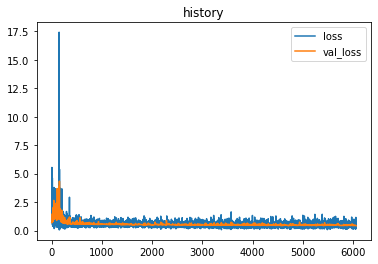

In [6]:
plt.plot(history[0], label="loss")
plt.plot(history[1], label="val_loss")
plt.legend()
plt.title("history")
plt.show()

In [4]:
model = torch.load("checkpoint.pt")
testY = testY.cpu().numpy()
with torch.no_grad():
    model.eval()
    pred = model(testX)
    pred = torch.round(pred).cpu().numpy()

/home/ykc/dev/miniconda3/envs/torch/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448238472/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.824


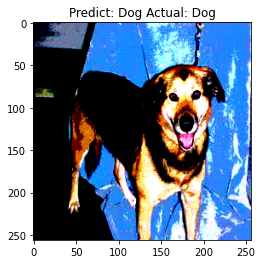

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


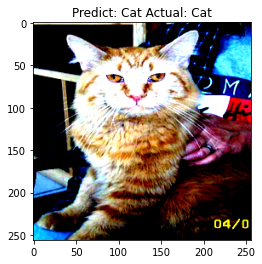

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


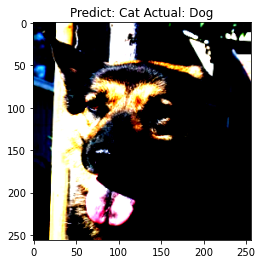

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


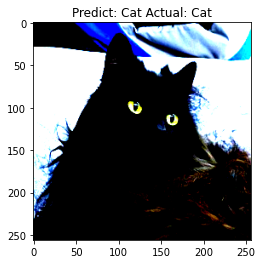

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


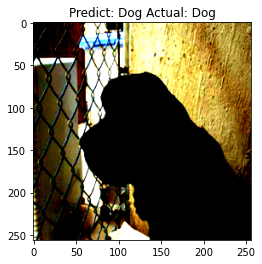

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


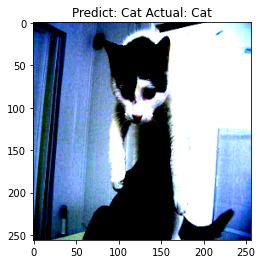

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


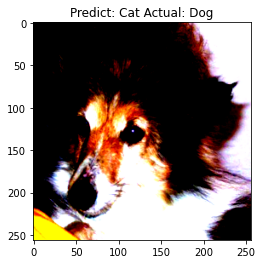

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


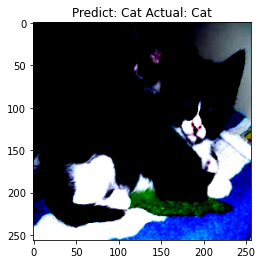

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


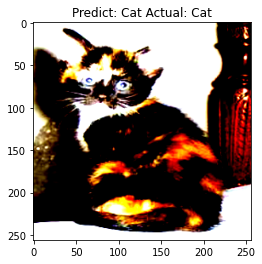

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


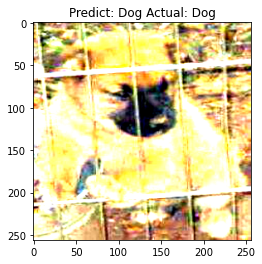

In [5]:
print(metrics.accuracy_score(pred, testY))
for i in range(10):
    plt.imshow(testX[i].permute(1, 2, 0).cpu().numpy())
    P = "Cat" if pred[i] == 0 else "Dog"
    A = "Cat" if testY[i] == 0 else "Dog"
    plt.title(f"Predict: {P} Actual: {A}")
    plt.show()